# 01a02 Manifold Toy Datasets

> Collection of toy datasets sampling from ideal manifolds

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FlowNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# hide
from FlowNet.datasets import (
    display_flow_galary,
    directed_circle, directed_spiral, directed_spiral_uniform, directed_spiral_delayed,
    directed_cylinder, directed_swiss_roll, directed_swiss_roll_uniform, directed_swiss_roll_delayed,
    directed_sine, directed_sine_ribbon, directed_sinh_branch, directed_sine_moons,
    directed_torus, directed_sphere
)

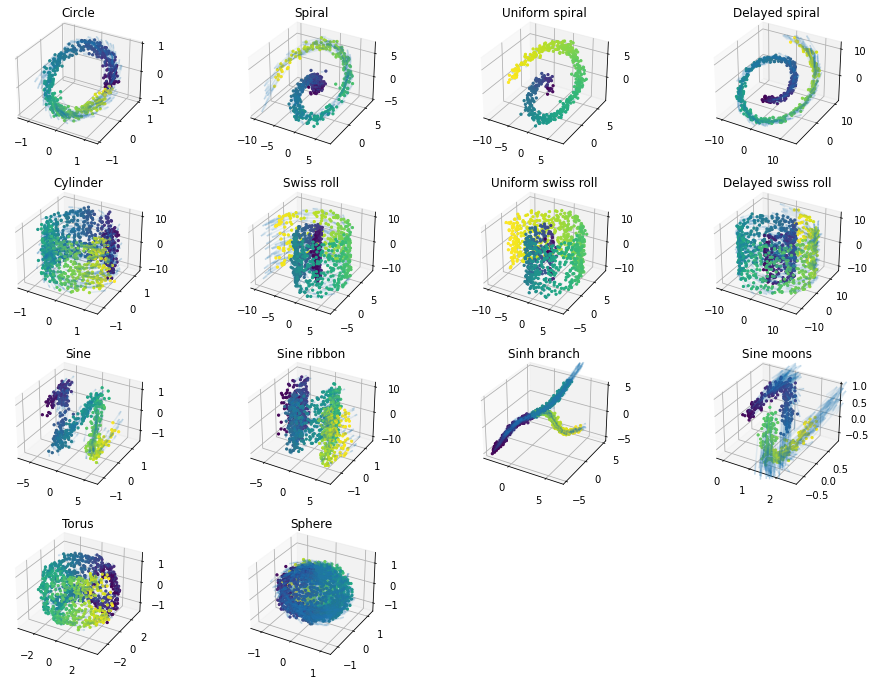

In [ ]:
# hide_input
func_set = [
    ("Circle"               , lambda: directed_circle(xtilt=np.pi/4, sigma=0.1)         ),
    ("Spiral"               , lambda: directed_spiral(xtilt=np.pi/4, sigma=0.5)         ),
    ("Uniform spiral"       , lambda: directed_spiral_uniform(xtilt=np.pi/4, sigma=0.5),),
    ("Delayed spiral"       , lambda: directed_spiral_delayed(xtilt=np.pi/4, sigma=0.5),),
    ("Cylinder"             , lambda: directed_cylinder(sigma=0.1),                     ),
    ("Swiss roll"           , lambda: directed_swiss_roll(sigma=0.3),                   ),
    ("Uniform swiss roll"   , lambda: directed_swiss_roll_uniform(sigma=0.3),           ),
    ("Delayed swiss roll"   , lambda: directed_swiss_roll_delayed(sigma=0.3),           ),
    ("Sine"                 , lambda: directed_sine(xtilt=np.pi/4, sigma=0.2),           ),
    ("Sine ribbon"          , lambda: directed_sine_ribbon(sigma=0.2),                   ),
    ("Sinh branch"          , lambda: directed_sinh_branch(xtilt=np.pi/4, sigma=0.2),   ),
    ("Sine moons"           , lambda: directed_sine_moons(xtilt=np.pi/4, sigma=0.1),     ),
    ("Torus"                , lambda: directed_torus(noise=0.1),                        ),
    ("Sphere"               , lambda: directed_sphere(noise=0.1)                        )
]
display_flow_galary(func_set)